In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
archivo = "BD_Auditoria_ETL_Periodo2_Profesional.xlsx"


In [26]:
df_empresas = pd.read_excel(archivo, sheet_name="Empresas")
df_auditores = pd.read_excel(archivo, sheet_name="Auditores")
df_auditorias = pd.read_excel(archivo, sheet_name="Auditorias")
df_hallazgos = pd.read_excel(archivo, sheet_name="Hallazgos")
df_fecha = pd.read_excel(archivo, sheet_name="Dim_Fecha")


In [27]:
df_completo = df_auditorias.merge(df_empresas, on="Empresa_ID", how="left")
df_completo = df_completo.merge(df_auditores, on="Auditor_ID", how="left")
df_completo.head()


,Auditoria_ID,Empresa_ID,Auditor_ID,Fecha,Resultado,Nivel_Riesgo,Cumple_IFRS,Nombre_x,Industria,Sistema_Origen,Ubicacion,Nombre_y,Especialidad
0,1,32,12,2024-12-16,Observaciones críticas,Medio,Sí,Grupo Financiero Inc,Tecnología,QuickBooks,Rogersmouth,Austin Smith,Cumplimiento
1,2,28,9,2024-06-17,Rechazada,Bajo,No,Grupo Financiero Inc,Manufactura,Otro,Jensenside,Brett Lucero,Finanzas
2,3,27,2,2025-01-26,Observaciones críticas,Alto,Sí,Grupo Financiero Inc,Manufactura,SAP,Martinezton,Eric Anthony,Normativa IFRS
3,4,15,13,2025-02-16,Rechazada,Medio,Parcial,Grupo Financiero and Sons,Aseguradora,Otro,North Bridgetport,Angela Knapp,Cumplimiento
4,5,31,6,2025-02-01,Sin observaciones,Bajo,No,Grupo Financiero Inc,Financiera,QuickBooks,Kyliemouth,Lisa Riley,TI


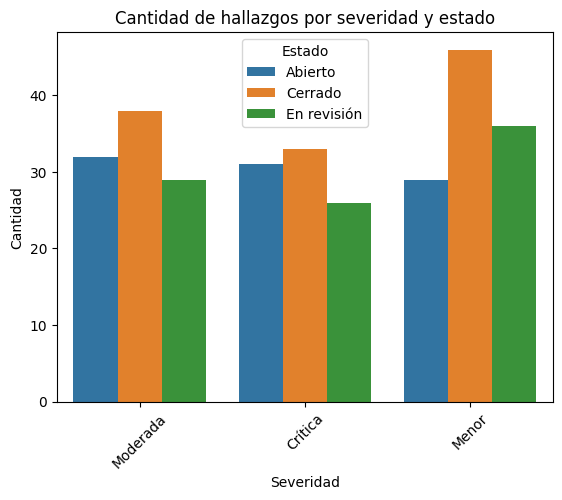

In [28]:
sns.countplot(data=df_hallazgos, x="Severidad", hue="Estado")
plt.title("Cantidad de hallazgos por severidad y estado")
plt.xlabel("Severidad")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


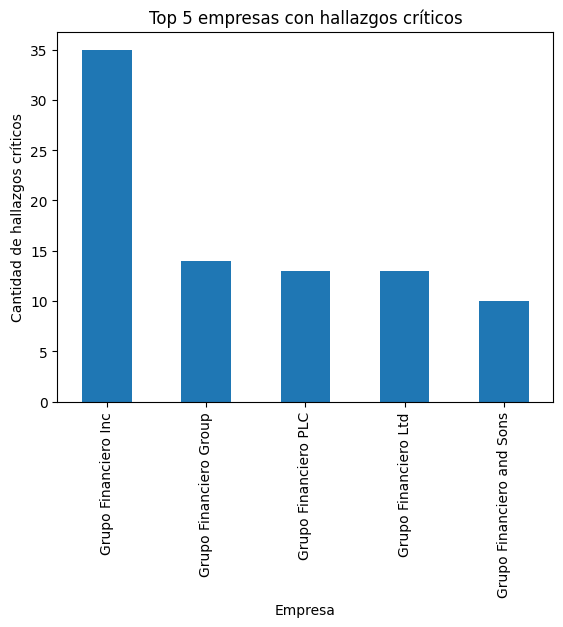

In [29]:
criticos = df_hallazgos[df_hallazgos["Severidad"] == "Crítica"]
empresas_con_criticos = criticos.merge(df_auditorias, on="Auditoria_ID")
empresas_con_criticos = empresas_con_criticos.merge(df_empresas, on="Empresa_ID")
top_empresas = empresas_con_criticos["Nombre"].value_counts().head(5)

top_empresas.plot(kind="bar", title="Top 5 empresas con hallazgos críticos")
plt.xlabel("Empresa")
plt.ylabel("Cantidad de hallazgos críticos")
plt.show()


Cumple_IFRS          No    Parcial         Sí
Nivel_Riesgo                                 
Alto          39.285714  29.761905  30.952381
Bajo          29.629630  35.185185  35.185185
Medio         40.322581  29.032258  30.645161


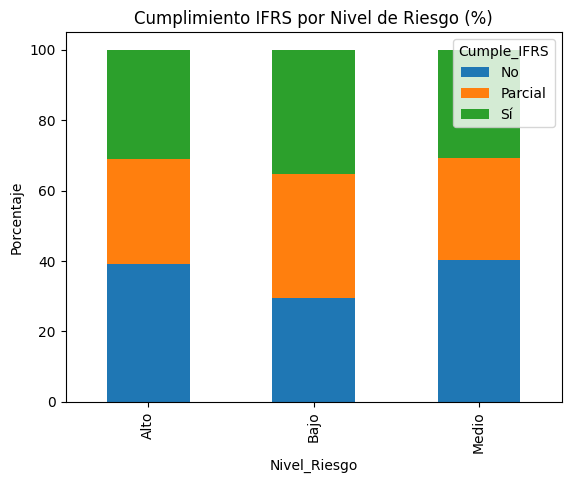

In [30]:
tabla = pd.crosstab(df_auditorias["Nivel_Riesgo"], df_auditorias["Cumple_IFRS"], normalize='index') * 100
print(tabla)

tabla.plot(kind='bar', stacked=True)
plt.title("Cumplimiento IFRS por Nivel de Riesgo (%)")
plt.ylabel("Porcentaje")
plt.show()


### ✅ KPI 1: Porcentaje de auditorías que cumplen IFRS

In [31]:
total = df_auditorias.shape[0]
cumplen = df_auditorias[df_auditorias["Cumple_IFRS"] == "Sí"].shape[0]
porcentaje = (cumplen / total) * 100
print(f"Porcentaje de auditorías que cumplen IFRS: {porcentaje:.2f}%")


Porcentaje de auditorías que cumplen IFRS: 32.00%


### 👤 KPI 2: Auditor con mayor cantidad de auditorías

In [32]:
mas_auditorias = df_completo["Nombre_y"].value_counts().head(1)
print("Auditor con más auditorías realizadas:")
print(mas_auditorias)

Auditor con más auditorías realizadas:
Nombre_y
Tonya Bradshaw    18
Name: count, dtype: int64


### 🏢 KPI 3: Empresa con más hallazgos totales

In [33]:
empresa_mas_hallazgos = df_hallazgos.merge(df_auditorias, on="Auditoria_ID").merge(df_empresas, on="Empresa_ID")
top_empresa = empresa_mas_hallazgos["Nombre"].value_counts().head(1)
print("Empresa con más hallazgos:")
print(top_empresa)


Empresa con más hallazgos:
Nombre
Grupo Financiero Inc    95
Name: count, dtype: int64


### 💰 KPI 4: Monto promedio de hallazgos por tipo

In [34]:
promedio_monto_tipo = df_hallazgos.groupby("Tipo")["Monto_Estimado"].mean().sort_values(ascending=False)
print(promedio_monto_tipo)


Tipo
Fraude          54072.402361
Seguridad TI    46998.937089
Cumplimiento    46883.515652
Contabilidad    46688.675500
Name: Monto_Estimado, dtype: float64
